# **Predicting Cancer Death Rate Using Supervised Mechine Learning Model**

Supervised Mechine (ML) is the proccess of guiding the mechine by providing examples of both predictiing and predicted varibles.

They are 2 types:

*                 Classification ( for predicting categorical data)
*                 Regression (for predicting continuous data)








### **About The Dataset**

**Context**

Many aspects of the behaviour of cancer disease are highly unpredictable. Even with the huge number of studies that have been 
done on the DNA mutation responsible for the disease, we are still unable to use these information at clinical level. However, it is important that we understand the effects and impacts of this disease from the past information as much as we possibly can.

**Content**

The data is collected from cancer.gov and the US Census American Community Survey. There are 34 columns including the target column. Some of the columns are listed below:



**Description of Variables**


***Features***


 1.avgAnnCount: Mean number of reported cases of cancer diagnosed annually

 2.avgDeathsPerYear: Mean number of reported mortalities due to cancer

 3.incidenceRate: Mean per capita (100,000) cancer diagoses

 4.medianIncome: Median income per county

 5.popEst2015: Population of county

 6.povertyPercent: Percent of populace in poverty

 7.studyPerCap: Per capita number of cancer-related clinical trials per county

 8.binnedInc: Median income per capita binned by decile

 9.MedianAge: Median age of county residents

 10.MedianAgeMale: Median age of male county residents

 11.MedianAgeFemale: Median age of female county residents 

 12.Geography: County name

 13.AvgHouseholdSize: Mean household size of county

 14.PercentMarried: Percent of county residents who are married

 15.PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

 16.PctEmployed16_Over: Percent of county residents ages 16 and over employed

 17.PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed

 18.PctPrivateCoverage: Percent of county residents with private health coverage 

 19.PctMarriedHouseholds: Percent of married households

 20.BirthRate: Number of live births relative to number of women in county

 21.PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma

 22.PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college

 23.PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree

 24.PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma

 25.PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree

 26.PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance)

 27.PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage

 28.PctPublicCoverage: Percent of county residents with government-provided health coverage

 29.PctWhite: Percent of county residents who identify as White

 30.PctBlack: Percent of county residents who identify as Black

 31.PctAsian: Percent of county residents who identify as Asian

 32.PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian
 
 33.PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

















***Target***

TARGET_deathRate: Dependent variable. Mean per capita (100,000) cancer mortalities















## **Importing Libraries**

We are going to import necessary libaries here



In [1]:
import pandas as pd                         # basic tool for dataframe multidimentional array
import numpy as np                          # mathmetical calculation
import matplotlib.pyplot as plt             # visualization package
import seaborn as sns                       # visualization package
import warnings                             # To ignore warnings in the notebook
warnings.filterwarnings('ignore')          

## **Loding The Data and displaying first 5 rows**

In [2]:
# Loading the training data in Pandas DataFrame
# Using pd.read_csv to read the csv (Comma Seperated Value ) file
cancer_data=pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv")

# Printing the shape ( nubers of rows and columns) of the dataframe using print function3
print(cancer_data.shape)
print()
#Displaying the first 5 rows of the dataset
cancer_data.head()


(3051, 34)



,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


## **Exploratory Data Analysis**



In [3]:
#Displaying the information on the data (number of rows and columns, number of non-null data points in each columns and data types)
cancer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

In [4]:
# Getting the summery about the numeric variables in round figure
cancer_data.describe().round()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0,785.0,3051.0,3051.0,3051.0,2899.0,3051.0,3051.0,2447.0,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0,3051.0
mean,571.0,176.0,449.0,46903.0,94958.0,17.0,159.0,44.0,40.0,42.0,2.0,52.0,18.0,35.0,41.0,6.0,35.0,13.0,54.0,8.0,65.0,49.0,41.0,36.0,19.0,84.0,9.0,1.0,2.0,51.0,6.0,179.0
std,1251.0,445.0,53.0,11902.0,276101.0,6.0,544.0,39.0,5.0,5.0,0.0,7.0,8.0,9.0,11.0,5.0,7.0,5.0,8.0,3.0,11.0,10.0,9.0,8.0,6.0,16.0,15.0,2.0,3.0,7.0,2.0,28.0
min,6.0,3.0,211.0,22640.0,827.0,3.0,0.0,22.0,22.0,22.0,0.0,25.0,0.0,0.0,7.0,0.0,8.0,3.0,18.0,0.0,23.0,17.0,14.0,12.0,3.0,11.0,0.0,0.0,0.0,24.0,0.0,66.0
25%,80.0,29.0,422.0,38752.0,12368.0,12.0,0.0,38.0,36.0,39.0,2.0,48.0,13.0,29.0,34.0,3.0,31.0,9.0,49.0,6.0,58.0,41.0,35.0,31.0,15.0,78.0,1.0,0.0,0.0,48.0,4.0,161.0
50%,171.0,62.0,454.0,45098.0,26777.0,16.0,0.0,41.0,40.0,42.0,2.0,52.0,17.0,35.0,41.0,5.0,35.0,12.0,54.0,8.0,65.0,49.0,41.0,36.0,19.0,90.0,2.0,1.0,1.0,52.0,5.0,178.0
75%,508.0,148.0,481.0,52410.0,68536.0,20.0,87.0,44.0,42.0,45.0,3.0,56.0,23.0,41.0,47.0,8.0,40.0,16.0,60.0,10.0,72.0,56.0,48.0,41.0,23.0,96.0,10.0,1.0,2.0,55.0,6.0,196.0
max,24965.0,9445.0,1207.0,125635.0,5238216.0,47.0,9762.0,526.0,65.0,66.0,4.0,72.0,64.0,72.0,79.0,52.0,55.0,40.0,76.0,29.0,92.0,79.0,71.0,65.0,47.0,100.0,85.0,36.0,39.0,72.0,21.0,363.0


In [5]:
# Getting the summery about the categorical variables in round figure
cancer_data.describe(include='object')


,binnedInc,Geography
count,3051,3051
unique,10,2285
top,"(51046.4, 54545.6]","McLean County, Illinois"
freq,318,2


In [6]:
#Missing Values Check 
missingvalues=(cancer_data.isnull().sum())

#Only missing values count
print(missingvalues[missingvalues>0])

#Percentage of missing values
percentage=(missingvalues[missingvalues>0]/cancer_data.shape[0])*100
percentage.round()

PctSomeCol18_24            2266
PctEmployed16_Over          152
PctPrivateCoverageAlone     604
dtype: int64


PctSomeCol18_24            74.0
PctEmployed16_Over          5.0
PctPrivateCoverageAlone    20.0
dtype: float64

In [7]:
# Counting Duplicate Values
cancer_data.duplicated(subset=None,keep='first').value_counts()


False    2285
True      766
dtype: int64

In [8]:
# Displaying All Duplicate Values
cancer1=cancer_data.copy()
cancer1.sort_values("popEst2015",inplace=True)
cancer1
dupli = cancer1.duplicated(keep=False)
cancer1[dupli]

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
2530,6.000000,3,373.300000,43859,1130,11.7,0.000000,"(42724.4, 45201]",51.2,53.0,49.6,"Wibaux County, Montana",2.15,56.5,18.7,28.0,53.3,0.0,37.4,16.4,54.7,3.0,68.1,45.2,36.2,38.5,14.3,100.000000,0.000000,0.000000,0.000000,51.785714,17.877095,214.4
1976,6.000000,3,373.300000,43859,1130,11.7,0.000000,"(42724.4, 45201]",51.2,53.0,49.6,"Wibaux County, Montana",2.15,56.5,18.7,28.0,53.3,0.0,37.4,16.4,54.7,3.0,68.1,45.2,36.2,38.5,14.3,100.000000,0.000000,0.000000,0.000000,51.785714,17.877095,214.4
1242,9.000000,4,374.800000,44990,1310,16.1,0.000000,"(42724.4, 45201]",52.0,51.9,52.2,"Sheridan County, North Dakota",2.05,63.2,40.7,33.3,NaN,13.0,36.8,12.0,54.7,2.0,67.9,42.7,26.0,45.6,23.3,98.279731,0.000000,0.000000,0.224383,55.742726,4.950495,124.8
2668,9.000000,4,374.800000,44990,1310,16.1,0.000000,"(42724.4, 45201]",52.0,51.9,52.2,"Sheridan County, North Dakota",2.05,63.2,40.7,33.3,NaN,13.0,36.8,12.0,54.7,2.0,67.9,42.7,26.0,45.6,23.3,98.279731,0.000000,0.000000,0.224383,55.742726,4.950495,124.8
2862,1962.667684,3,453.549422,52795,1330,10.8,0.000000,"(51046.4, 54545.6]",49.4,48.7,49.9,"Greeley County, Kansas",2.46,66.6,4.8,0.0,NaN,40.3,30.3,20.4,60.5,2.1,81.9,60.5,42.7,28.8,10.5,87.173203,0.898693,0.326797,8.905229,64.681725,5.687204,156.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,13294.000000,4895,434.900000,66034,3299521,14.7,139.111101,"(61494.5, 125635]",35.1,33.7,36.5,"San Diego County, California",2.86,47.2,10.9,32.2,NaN,9.6,19.0,22.1,56.7,8.7,66.6,55.5,44.6,28.4,16.8,70.851690,5.065812,11.450233,6.707309,49.617834,4.953959,157.1
1082,14477.000000,5108,433.800000,54230,4538028,17.3,391.359419,"(51046.4, 54545.6]",32.8,32.0,33.6,"Harris County, Texas",2.88,47.2,19.9,30.5,40.9,8.8,23.3,18.9,63.2,7.5,54.7,47.6,42.8,27.5,19.8,63.121729,18.861747,6.572709,8.734237,46.913495,6.028644,161.4
2371,14477.000000,5108,433.800000,54230,4538028,17.3,391.359419,"(51046.4, 54545.6]",32.8,32.0,33.6,"Harris County, Texas",2.88,47.2,19.9,30.5,40.9,8.8,23.3,18.9,63.2,7.5,54.7,47.6,42.8,27.5,19.8,63.121729,18.861747,6.572709,8.734237,46.913495,6.028644,161.4
2364,24965.000000,9445,470.800000,55058,5238216,17.1,371.118717,"(54545.6, 61494.5]",35.9,34.7,37.1,"Cook County, Illinois",2.65,41.9,14.9,26.7,NaN,15.5,24.0,21.5,59.0,10.7,61.5,NaN,46.3,32.6,22.0,56.842582,23.982596,6.772830,9.847733,41.008791,4.994881,177.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc53e121f28>,
      dtype=object)

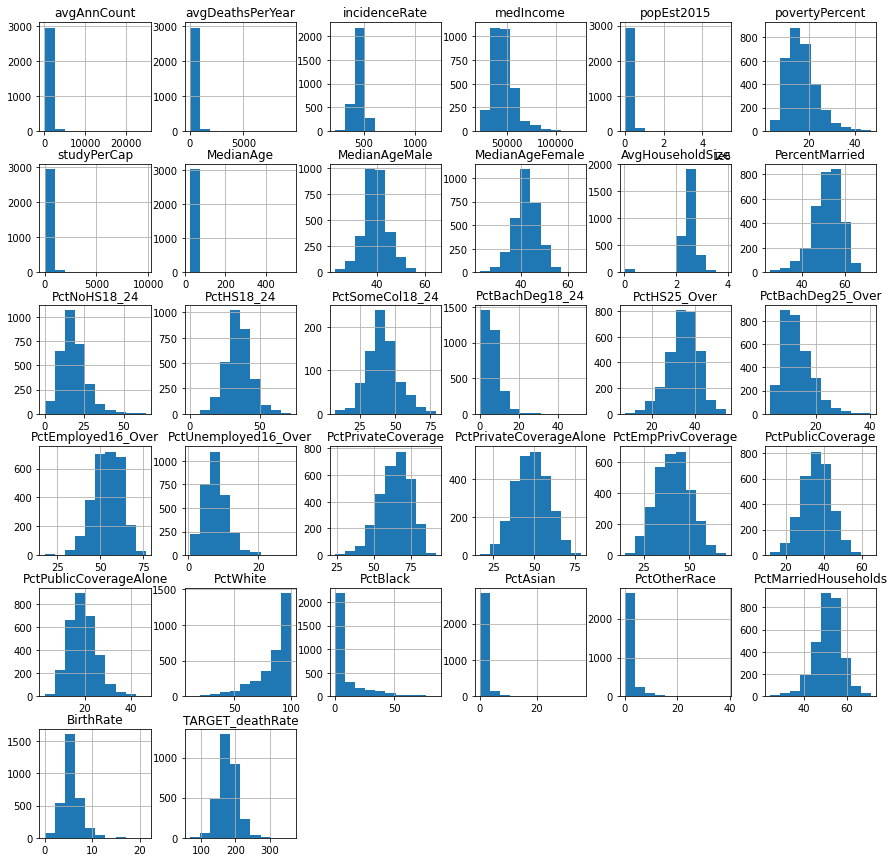

In [9]:
# Observing the Data Distribution using Matplotlib
cancer_data.hist(figsize=(15,15))



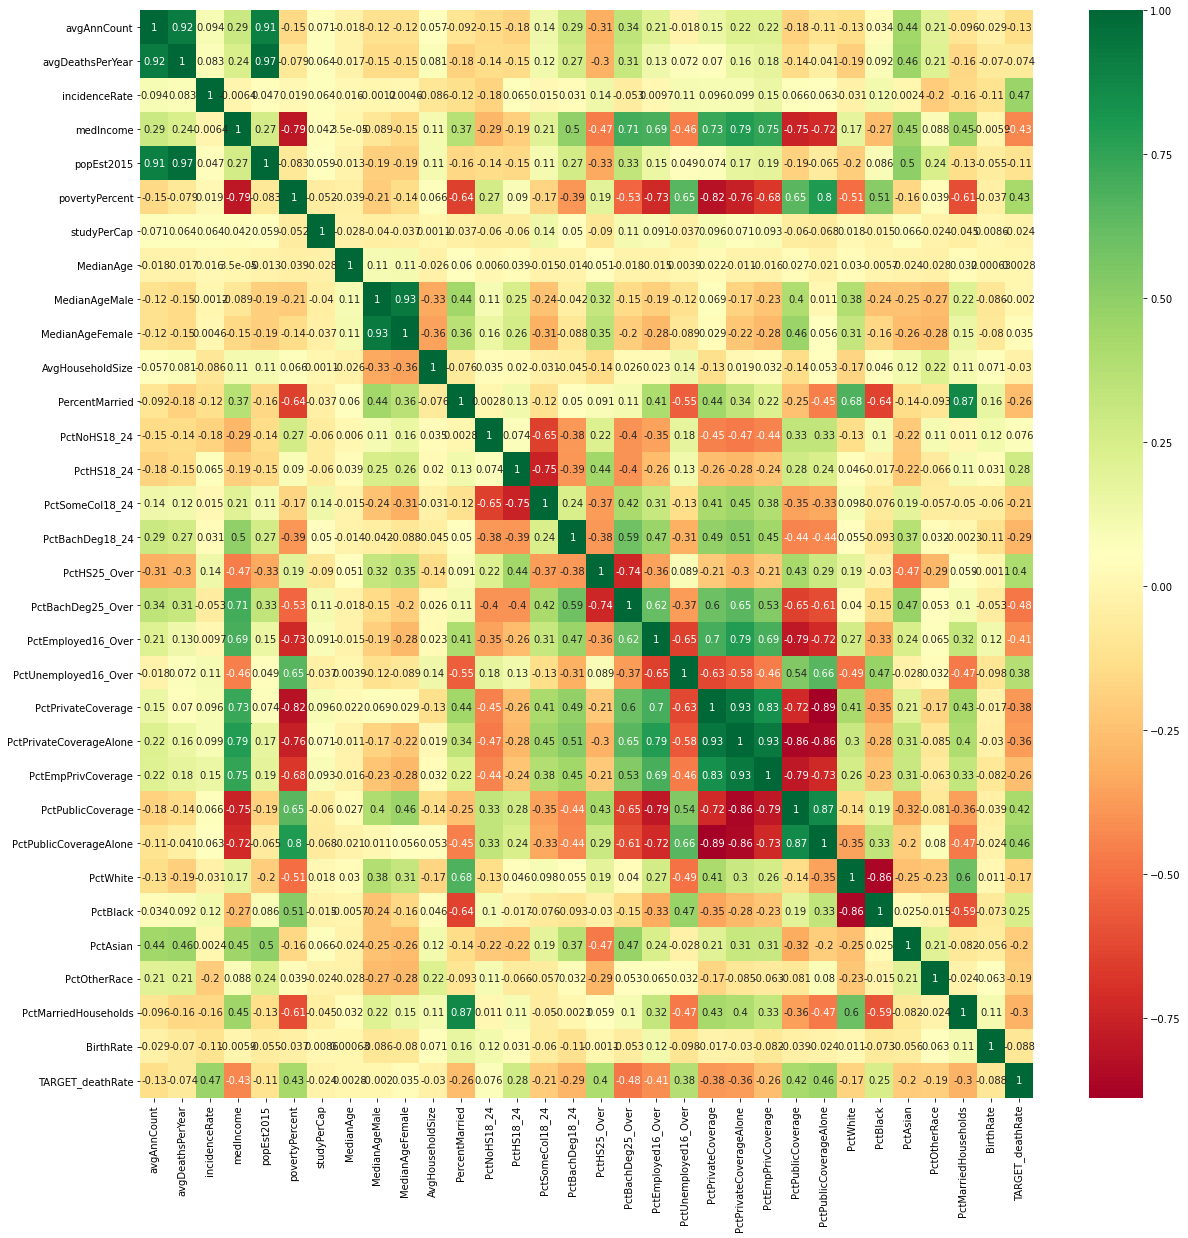

In [10]:
# Displaying correlation between Target Varible and Input Features using Heatmap from seaborn
datacorr=cancer_data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(datacorr,annot=True,cmap='RdYlGn')



In [11]:
# Sorting the input features based on correlation with Target variable
datacorr['TARGET_deathRate'].sort_values(ascending=False)


TARGET_deathRate           1.000000
incidenceRate              0.467683
PctPublicCoverageAlone     0.456804
povertyPercent             0.427118
PctPublicCoverage          0.422291
PctHS25_Over               0.403449
PctUnemployed16_Over       0.379085
PctHS18_24                 0.284328
PctBlack                   0.250954
PctNoHS18_24               0.075815
MedianAgeFemale            0.034693
MedianAge                  0.002772
MedianAgeMale             -0.002006
studyPerCap               -0.023890
AvgHouseholdSize          -0.030288
avgDeathsPerYear          -0.074008
BirthRate                 -0.088322
popEst2015                -0.111470
avgAnnCount               -0.130745
PctWhite                  -0.173265
PctOtherRace              -0.189210
PctAsian                  -0.202352
PctSomeCol18_24           -0.206337
PctEmpPrivCoverage        -0.257117
PercentMarried            -0.262946
PctBachDeg18_24           -0.292220
PctMarriedHouseholds      -0.298414
PctPrivateCoverageAlone   -0

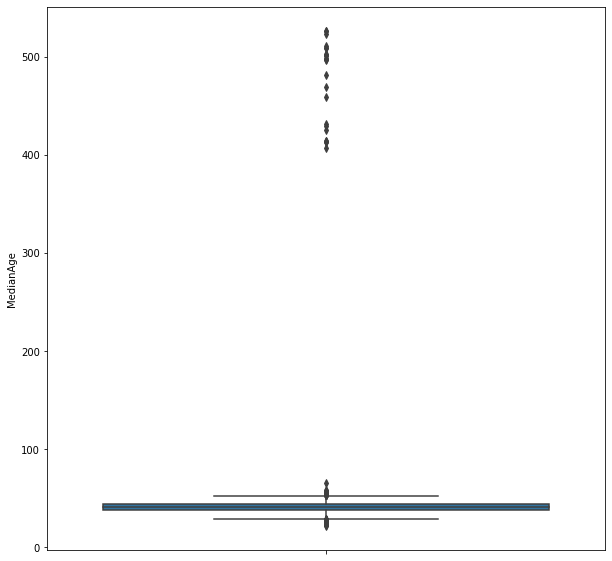

In [12]:
# Finding out outliers in column Median Age using Boxplot as its maximum value is 526
plt.figure(figsize=(10,10))
sns.boxplot(data=cancer_data,y='MedianAge',whis=1.5)



In [13]:
# Showing the unique values of column Median Age
cancer_data.MedianAge.unique()

array([ 48.4,  41.9,  48.9,  44.2,  45. ,  36.8,  43.2,  40.5,  41.3,
        36.5,  39.1,  30.7,  54.1,  48.5,  40.6,  40.3,  45.6,  42. ,
        39.3,  37.8,  49.3,  35.4,  42.6,  30.3,  47.2,  42.5,  43.9,
        39.4,  39.8,  40. ,  38.2,  40.4,  39.9,  41. ,  38.9,  41.1,
        36.7,  48.3,  27.8,  45.4,  33.3,  38.1,  45.8,  42.4,  37.9,
        41.6,  43.5,  40.9,  42.9,  37.6,  42.1,  47.8,  28.4,  36.1,
        43.8,  39.6,  40.8,  42.3,  38.5,  47.1,  35.5,  42.8,  37.7,
        38. ,  46.6,  31.1,  43. ,  44.8,  36.6,  46.5,  33.6,  38.7,
        45.7,  34.6,  51.5,  31.8,  33.2,  32.7,  42.7,  38.4,  46.4,
        42.2,  43.3,  46.7,  36. ,  30. ,  37.5,  44.4,  43.6,  29.4,
        48. ,  37.4,  33.8,  39. ,  49.4,  52.1,  46.1,  40.1,  44.6,
        33.5,  32.9,  50.7,  44.1,  41.8, 424.8,  34. ,  36.3,  30.4,
        29.2,  41.7,  41.5,  44.7,  47.4,  51.2, 458.4,  39.2,  34.9,
        43.1,  44.5,  38.3,  41.4,  41.2,  28.5,  27.6,  28.6,  38.8,
        39.7,  32.4,

# **Performing Data Preparation**

In [14]:
# Delecting irrelevant columns
del cancer_data['binnedInc']
del cancer_data['Geography']

# Deleting columns contain more than 30% missing values
del cancer_data['PctSomeCol18_24']

In [15]:
# Filling up null values of columns contain missing values less than 30%
cancer_data.PctPrivateCoverageAlone.fillna(cancer_data.PctPrivateCoverageAlone.median(),inplace=True)
cancer_data.PctEmployed16_Over.fillna(cancer_data.PctEmployed16_Over.median(),inplace=True)

In [16]:
# Replacing the ouliers in Median Age with column median
median_MedianAge = cancer_data['MedianAge'].median()
cancer_data['MedianAge']=cancer_data['MedianAge'].mask(cancer_data.MedianAge>80,median_MedianAge)
median_MedianAge

41.0

## **Separating the Input and Target Features of the data**

In [17]:
# Separatingg data into Input and Target Variable

y = cancer_data[['TARGET_deathRate']]                  # target variable
x = cancer_data.drop('TARGET_deathRate',axis=1)        # input variables

## **Splitting the data into Train and Test Sets**

In [18]:
# Importing train_test_split from Skitlearn library
from sklearn.model_selection import train_test_split

# Splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

print("Shape of the original  data: ", cancer_data.shape)
print("Shape of the train data = ", x_train.shape)
print("Shape of the test data = ", x_test.shape)

Shape of the original  data:  (3051, 31)
Shape of the train data =  (2440, 30)
Shape of the test data =  (611, 30)


# **Build Machine Learning Model** 

In [19]:
# Building the Linear Regression model 
from sklearn.linear_model import LinearRegression       # Importing Linear Regression

# Traning the data
basemodel = LinearRegression()      
basemodel.fit(x_train,y_train)                          # Fitting the data in the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### **Evaluating the model with various Evaluation Metrics**

In [20]:
# Importing Metrics from Skitlearn and measuring Errors
from sklearn import metrics

# Showing the metric values
print('Metrics of Linear Regression Model:',"\n")

# print result of MAE
print('Train data MAE:',metrics.mean_absolute_error(y_train,basemodel.predict(x_train)))
print('Test data MAE:',metrics.mean_absolute_error(y_test,basemodel.predict(x_test)),"\n")

#print result of MSE
print('Train data MSE:',metrics.mean_squared_error(y_train,basemodel.predict(x_train)))
print('Test data MSE:',metrics.mean_squared_error(y_test,basemodel.predict(x_test)),"\n")

#print result of RMSE
print('Train data RMSE:',np.sqrt(metrics.mean_squared_error(y_train,basemodel.predict(x_train))))
print('Test data RMSE:',np.sqrt(metrics.mean_squared_error(y_test,basemodel.predict(x_test))),"\n")

#print result of R Square
print("R Square of Train Data:",metrics.r2_score(y_train, basemodel.predict(x_train)))
print("R Square of Train Data:",metrics.r2_score(y_test, basemodel.predict(x_test)))


Metrics of Linear Regression Model: 

Train data MAE: 13.786873427860627
Test data MAE: 14.325619660448773 

Train data MSE: 352.37254310661876
Test data MSE: 368.21378124740704 

Train data RMSE: 18.771588720899963
Test data RMSE: 19.18889734318799 

R Square of Train Data: 0.5266101841732491
R Square of Train Data: 0.5518436938715341


## **Other Machine Learning Models and Evaluation**

In [21]:
# Building the Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor

# Training the data
dt=DecisionTreeRegressor(max_depth=4)
dt.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
print('Metrics of Decision Tree Regressor Model:',"\n")

#print result of MSE
print('Train data MSE:',metrics.mean_squared_error(y_train,dt.predict(x_train)))
print('Test data MSE:',metrics.mean_squared_error(y_test,dt.predict(x_test)),'\n')

#print result of R Square
print("R Square of Train Data:",metrics.r2_score(y_train, dt.predict(x_train)))
print("R Square of Train Data:",metrics.r2_score(y_test, dt.predict(x_test)))

Metrics of Decision Tree Regressor Model: 

Train data MSE: 382.4855246431222
Test data MSE: 516.9300727954121 

R Square of Train Data: 0.4861553330152051
R Square of Train Data: 0.3708397573662453


In [23]:
# Building the Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor

# Training the data
rm=RandomForestRegressor()
rm.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
print('Metrics of Random Forest Regressor Model:',"\n")

#print result of MSE
print('Train data MSE:',metrics.mean_squared_error(y_train,rm.predict(x_train)))
print('Test data MSE:',metrics.mean_squared_error(y_test,rm.predict(x_test)),'\n')

#print result of R Square
print("R Square of Train Data:",metrics.r2_score(y_train,rm.predict(x_train)))
print("R Square of Train Data:",metrics.r2_score(y_test, rm.predict(x_test)))

Metrics of Random Forest Regressor Model: 

Train data MSE: 30.188050820081873
Test data MSE: 251.51264154337161 

R Square of Train Data: 0.959444298094579
R Square of Train Data: 0.6938817010139158


In [25]:
# Building the Gradient Boosting Regression model
from sklearn.ensemble import GradientBoostingRegressor

# Training the data
gb=GradientBoostingRegressor(n_estimators=3000)
gb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [26]:
print('Metrics of Gradient BoostingRegressor Model:',"\n")

#print result of MSE
print('Train data MSE:',metrics.mean_squared_error(y_train,gb.predict(x_train)))
print('Test data MSE:',metrics.mean_squared_error(y_test,gb.predict(x_test)),'\n')

#print result of R Square
print("R Square of Train Data:",metrics.r2_score(y_train,gb.predict(x_train)))
print("R Square of Train Data:",metrics.r2_score(y_test, gb.predict(x_test)))

Metrics of Gradient BoostingRegressor Model: 

Train data MSE: 0.11008039617544559
Test data MSE: 138.67025355450994 

R Square of Train Data: 0.9998521140778671
R Square of Train Data: 0.8312231867249684



```
# **The Gradient Boosting Regression model perform the best**
```



# **Performing Hyperparameter Tuning**

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

### **`Randomized Search CV Method`**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV    
gb = GradientBoostingRegressor()
parameters = {
    'n_estimators': [250,1000,2000,3000,5000,8000,10000,15000],
    'max_depth': [2, 3, 4, 8, 16, 32, None],
    'learning_rate': [0.03, 0.1, 0.3, 1]
}
rs = RandomizedSearchCV(gb, parameters, cv=5)
rs.fit(x_train, y_train)

print_results(rs)


BEST PARAMS: {'n_estimators': 10000, 'max_depth': 2, 'learning_rate': 0.1}

0.417 (+/-0.092) for {'n_estimators': 1000, 'max_depth': 32, 'learning_rate': 0.1}
0.402 (+/-0.092) for {'n_estimators': 10000, 'max_depth': 32, 'learning_rate': 0.3}
0.414 (+/-0.098) for {'n_estimators': 2000, 'max_depth': None, 'learning_rate': 0.1}
0.78 (+/-0.03) for {'n_estimators': 10000, 'max_depth': 3, 'learning_rate': 0.03}
0.507 (+/-0.127) for {'n_estimators': 8000, 'max_depth': 3, 'learning_rate': 1}
0.337 (+/-0.071) for {'n_estimators': 2000, 'max_depth': 16, 'learning_rate': 1}
0.358 (+/-0.094) for {'n_estimators': 250, 'max_depth': 16, 'learning_rate': 1}
0.4 (+/-0.094) for {'n_estimators': 5000, 'max_depth': 32, 'learning_rate': 0.3}
0.79 (+/-0.03) for {'n_estimators': 10000, 'max_depth': 2, 'learning_rate': 0.1}
0.758 (+/-0.047) for {'n_estimators': 10000, 'max_depth': 3, 'learning_rate': 0.3}


### **`Grid Search CV Method`**

In [ ]:
from sklearn.model_selection import GridSearchCV
gb = GradientBoostingRegressor()
parameters = {
    'n_estimators': [2000,3000,5000,8000,10000,15000],
    'max_depth': [2,3,4,5],
    'learning_rate': [0.03, 0.1, 0.3]
}
cv = GridSearchCV(gb, parameters, cv=5)
cv.fit(x_train, y_train)

print_results(cv)


BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 15000}

0.72 (+/-0.039) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 2000}
0.742 (+/-0.034) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 3000}
0.765 (+/-0.035) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 5000}
0.779 (+/-0.033) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 8000}
0.783 (+/-0.033) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 10000}
0.786 (+/-0.031) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 15000}
0.762 (+/-0.032) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 2000}
0.772 (+/-0.033) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 3000}
0.778 (+/-0.031) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 5000}
0.78 (+/-0.031) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 8000}
0.779 (+/-0.031) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 10000}
0.779 (+/-

In [ ]:
cv.best_score_

0.7904472003595334

In [ ]:
print(cv.best_estimator_)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=15000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


## **Model Evaluation after tuning** 

### **`Applying parameters of Randomized Search CV `**

In [ ]:
# Using best found parameters from RandomizedSearchCV

gb=GradientBoostingRegressor(n_estimators=10000,learning_rate=0.1,max_depth=2)
gb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=10000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
print('Metrics of Gradient BoostingRegressor Model after Hyperparameter Tuning - RandomizedSearchCV :',"\n")

#print result of MSE
print('Train data MSE:',metrics.mean_squared_error(y_train,gb.predict(x_train)))
print('Test data MSE:',metrics.mean_squared_error(y_test,gb.predict(x_test)),'\n')

#print result of R Square
print("R Square of Train Data:",metrics.r2_score(y_train,gb.predict(x_train)))
print("R Square of Train Data:",metrics.r2_score(y_test, gb.predict(x_test)))

Metrics of Gradient BoostingRegressor Model after Hyperparameter Tuning - RandomizedSearchCV : 

Train data MSE: 0.17260071454324383
Test data MSE: 121.7463173822617 

R Square of Train Data: 0.9997681220569888
R Square of Train Data: 0.8518214617118911


**Hyperparapmeter tuning using Randomized Search CV improves the performance**

**`Applying parameters of Grid Search CV`**

In [27]:
# Using best found parameters from GridSearchCV

gb=GradientBoostingRegressor(n_estimators=15000,learning_rate=0.1,max_depth=2)
gb.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=15000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [28]:
print('Metrics of Gradient BoostingRegressor Model after Hyperparameter Tuning - GridSearchCV :',"\n")

#print result of MSE
print('Train data MSE:',metrics.mean_squared_error(y_train,gb.predict(x_train)))
print('Test data MSE:',metrics.mean_squared_error(y_test,gb.predict(x_test)),'\n')

#print result of R Square
print("R Square of Train Data:",metrics.r2_score(y_train,gb.predict(x_train)))
print("R Square of Train Data:",metrics.r2_score(y_test, gb.predict(x_test)))

Metrics of Gradient BoostingRegressor Model after Hyperparameter Tuning - GridSearchCV : 

Train data MSE: 0.015481964205426083
Test data MSE: 121.72875404612815 

R Square of Train Data: 0.9999792009782623
R Square of Train Data: 0.8518428382063239


**Hyperparapmeter tuning using Grid Search CV improves the performance**

# **Feature Selection Technique**

### **RFE**

**Applying Recursive Feature Elimination (RFE)**

Recursive Feature Elimination works by recursively(repeatedly) removing features and building a model on the features that remain.



In [ ]:
from sklearn.feature_selection import RFE                              #importing RFE class from sklearn library

rfe=RFE(estimator=gb,step=1)                                           # estimator gb is the baseline model (basic model)

fit=rfe.fit(x_train,y_train)                                           # Fit the function for ranking the features

print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Num Features: 15
Selected Features: [ True  True  True  True  True  True False False False  True False False
 False  True False  True  True False  True  True False False False False
 False  True False  True  True False]
Feature Ranking: [ 1  1  1  1  1  1 14 16  6  1  4 12 11  1 15  1  1  2  1  1 10  7 13  3
  9  1  8  1  1  5]


**Representing feature ranks in the form of a table**

In [ ]:
selected_rfe_feature=pd.DataFrame({'Features':list(x_train.columns),'Ranking':rfe.ranking_})
selected_rfe_feature.sort_values(by='Ranking')

,Features,Ranking
0,avgAnnCount,1
1,avgDeathsPerYear,1
2,incidenceRate,1
3,medIncome,1
4,popEst2015,1
5,povertyPercent,1
27,PctOtherRace,1
25,PctBlack,1
16,PctBachDeg25_Over,1
9,MedianAgeFemale,1


**Create a new subset of the data with only the selected features**

In [ ]:
# Transforming the data
x_train_rfe=rfe.transform(x_train)
x_test_rfe=rfe.transform(x_test)

In [ ]:
# Fitting our baseline model with the transformed data
lr_rfe_model=rfe.fit(x_train_rfe,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Printing shape of the train data
x_train_rfe.shape

(2440, 15)

**Model performance with feature selection**

In [ ]:
# making predictions and evaluating the model
print('Test data MSE:',metrics.mean_squared_error(y_test,rfe.predict(x_test_rfe)))


Test data MSE: 173.42603638863548


***Performation does not improve after feature selection using RFE***

# **Boruta**

Unlike other methods, Boruta select all relevant features.


**Important features of Bouta:**
*   **BorutaPy accepts numpy array only.**
*   **Boruta by default uses Random Forest.**



  

**Installing Boruta**

In [ ]:
! pip install Boruta

     |████████████████████████████████| 61kB 3.3MB/s 


**Importing essential libraries**

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
from boruta import BorutaPy


In [ ]:
# Baseline model_ Random Forest Regressor
RandomForest_BaseModel=RandomForestRegressor()

# Train the Random Forest Base Model
RandomForest_BaseModel.fit(x_train,y_train) 


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

**Applying and Evaluating the dataset with full featured Regressor**

In [ ]:
print('Metrics of Base Model Random Forest Regressor :',"\n")

#print result of MSE
print('Train data MSE:',metrics.mean_squared_error(y_train,RandomForest_BaseModel.predict(x_train)))
print('Test data MSE:',metrics.mean_squared_error(y_test,RandomForest_BaseModel.predict(x_test)),'\n')

#print result of R Square
print("R Square of Train Data:",metrics.r2_score(y_train,RandomForest_BaseModel.predict(x_train)))
print("R Square of Train Data:",metrics.r2_score(y_test, RandomForest_BaseModel.predict(x_test)))

Metrics of Base Model Random Forest Regressor : 

Train data MSE: 31.849376095901565
Test data MSE: 260.76921466284773 

R Square of Train Data: 0.9572124145902202
R Square of Train Data: 0.6826154425849703


### **Applying Boruta as Numpy array**

In [ ]:
Boruta=BorutaPy(RandomForest_BaseModel, n_estimators='auto', verbose=2, random_state=1)

# Fitting Boruta into the train dataset
Boruta.fit(np.array(x_train),np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	30
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	25
Tentative: 	5
Rejected: 	0
Iteration: 	9 / 100
Confirmed: 	25
Tentative: 	5
Rejected: 	0
Iteration: 	10 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
Iteration: 	11 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
Iteration: 	12 / 100
Confirmed: 	25
Tentative: 	4
Rejected: 	1
Iteration: 	13 / 100
Confirmed: 	25
Tentative: 	3
Rejected: 	2
Iteration: 	14 / 100
Confirmed: 	25
Tentative: 	3
Rejected: 	2
Iteration: 	15 / 100
Confirmed: 	25
Tentative: 	3
Rejected: 	2
Iteration: 	16 / 100
Confirmed: 	26
Tentative: 	2
Rejected: 	2
I

BorutaPy(alpha=0.05,
         estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                         criterion='mse', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1,
                                         min_samples_split=2,
                                         min_weight_fraction_leaf=0.0,
                                         n_estimators=73, n_jobs=None,
                                         oob_score=False,
                                         random_state=RandomState(MT19937) at 0x7F0ECF6FF258,
                                         verbose=0, warm_start=False),
         max_iter=100, n_estimators='auto', perc=100,
         random

**Displaying the number of relevant features**

In [ ]:
# Checking number of selected features
print("Number of selected features: ",Boruta.n_features_,"\n")

# check selected features
print("Selected Features: ",Boruta.support_,"\n")
 
# check ranking of features
print("Ranking: ",Boruta.ranking_)


Number of selected features:  27 

Selected Features:  [ True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True] 

Ranking:  [1 1 1 1 1 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1]


In [ ]:
# Displaying the selected features in a table
selected_features=pd.DataFrame({'Features':list(x_train.columns),'Ranking':Boruta.ranking_})
selected_features.sort_values(by='Ranking')

,Features,Ranking
0,avgAnnCount,1
27,PctOtherRace,1
26,PctAsian,1
25,PctBlack,1
24,PctWhite,1
23,PctPublicCoverageAlone,1
22,PctPublicCoverage,1
21,PctEmpPrivCoverage,1
19,PctPrivateCoverage,1
18,PctUnemployed16_Over,1


In [ ]:
# Creating train and test data only with irelevant features
x_important_train = Boruta.transform(np.array(x_train))
x_important_test = Boruta.transform(np.array(x_test))

In [ ]:
# Create a new random forest regressor for the most important features
RandomForestModel_important = RandomForestRegressor()

# Train the new regressor on the new dataset containing the most important features
RandomForestModel_important.fit(x_important_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
print('Metrics of important featured Model Random Forest Regressor :',"\n")

#print result of MSE
print('Important featured Train data MSE:',metrics.mean_squared_error(y_train,RandomForestModel_important.predict(x_important_train)))
print('Important featured Test data MSE:',metrics.mean_squared_error(y_test,RandomForestModel_important.predict(x_important_test)),'\n')

#print result of R Square
print("R Square of Important featured Train Data:",metrics.r2_score(y_train,RandomForestModel_important.predict(x_important_train)))
print("R Square ofImportant featured  Test Data:",metrics.r2_score(y_test,RandomForestModel_important.predict(x_important_test)))


Metrics of Base Model Random Forest Regressor : 

Train data MSE: 30.690471855737638
Test data MSE: 252.86535061538456 

R Square of Train Data: 0.958769327793432
R Square of Train Data: 0.6922353066314837


***The performance improved a bit after feature selection ***